<a href="https://colab.research.google.com/github/DAVIDCUEAGUI/LABORATORIO/blob/main/Componentes_principales_y_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset World Happiness Report

El Informe Mundial sobre la Felicidad es un estudio de referencia sobre el estado de la felicidad mundial. El primer informe se publicó en 2012, el segundo en 2013, el tercero en 2015 y el cuarto en la Actualización de 2016. El Informe Mundial sobre la Felicidad 2017, que clasifica a 155 países según sus niveles de felicidad, se presentó en las Naciones Unidas en un evento que celebraba el Día Internacional de la Felicidad el 20 de marzo. El informe sigue ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más los indicadores de felicidad para fundamentar sus decisiones de formulación de políticas. Los principales expertos en todos los campos (economía, psicología, análisis de encuestas, estadísticas nacionales, salud, políticas públicas y más) describen cómo se pueden utilizar eficazmente las mediciones del bienestar para evaluar el progreso de las naciones. Los informes analizan el estado de la felicidad en el mundo actual y muestran cómo la nueva ciencia de la felicidad explica las variaciones personales y nacionales en la felicidad.

In [ ]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [ ]:
!pip install kaggle

# Sube tu archivo kaggle.json
from google.colab import files
files.upload()

# Crea un directorio y mueve kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset
!kaggle datasets download -d unsdsn/world-happiness

# Descomprimir el dataset
!unzip world-happiness.zip

# Leer el archivo CSV
import pandas as pd
df = pd.read_csv('2019.csv')

print(df.head())

Saving archive (3).zip to archive (3) (1).zip
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  world-happiness.zip
replace 2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2017.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2018.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace 2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3  

In [ ]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
# Eliminar la columna 'Overall rank'
df = df.drop('Overall rank', axis=1)

# Imprimir las primeras 5 filas del DataFrame (sin la columna eliminada)
print(df.head())

  Country or region  Score  GDP per capita  Social support  \
0           Finland  7.769           1.340           1.587   
1           Denmark  7.600           1.383           1.573   
2            Norway  7.554           1.488           1.582   
3           Iceland  7.494           1.380           1.624   
4       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298  


            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   

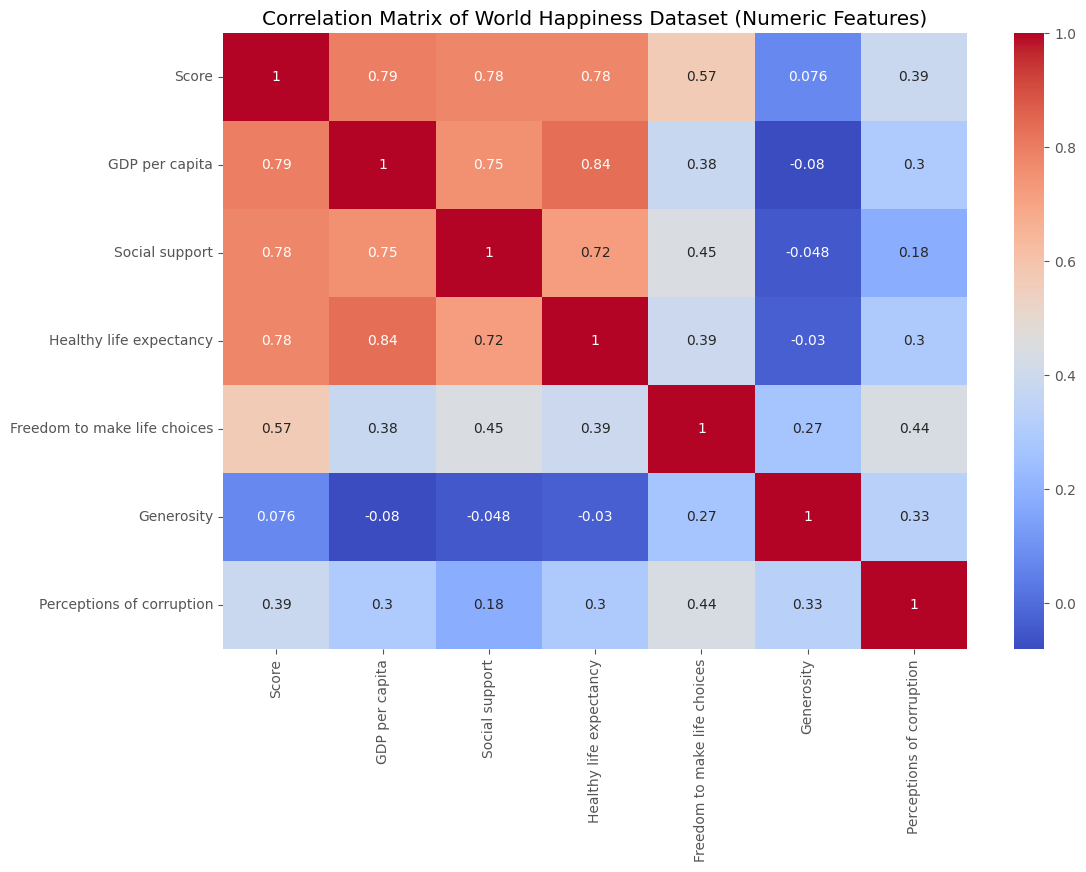

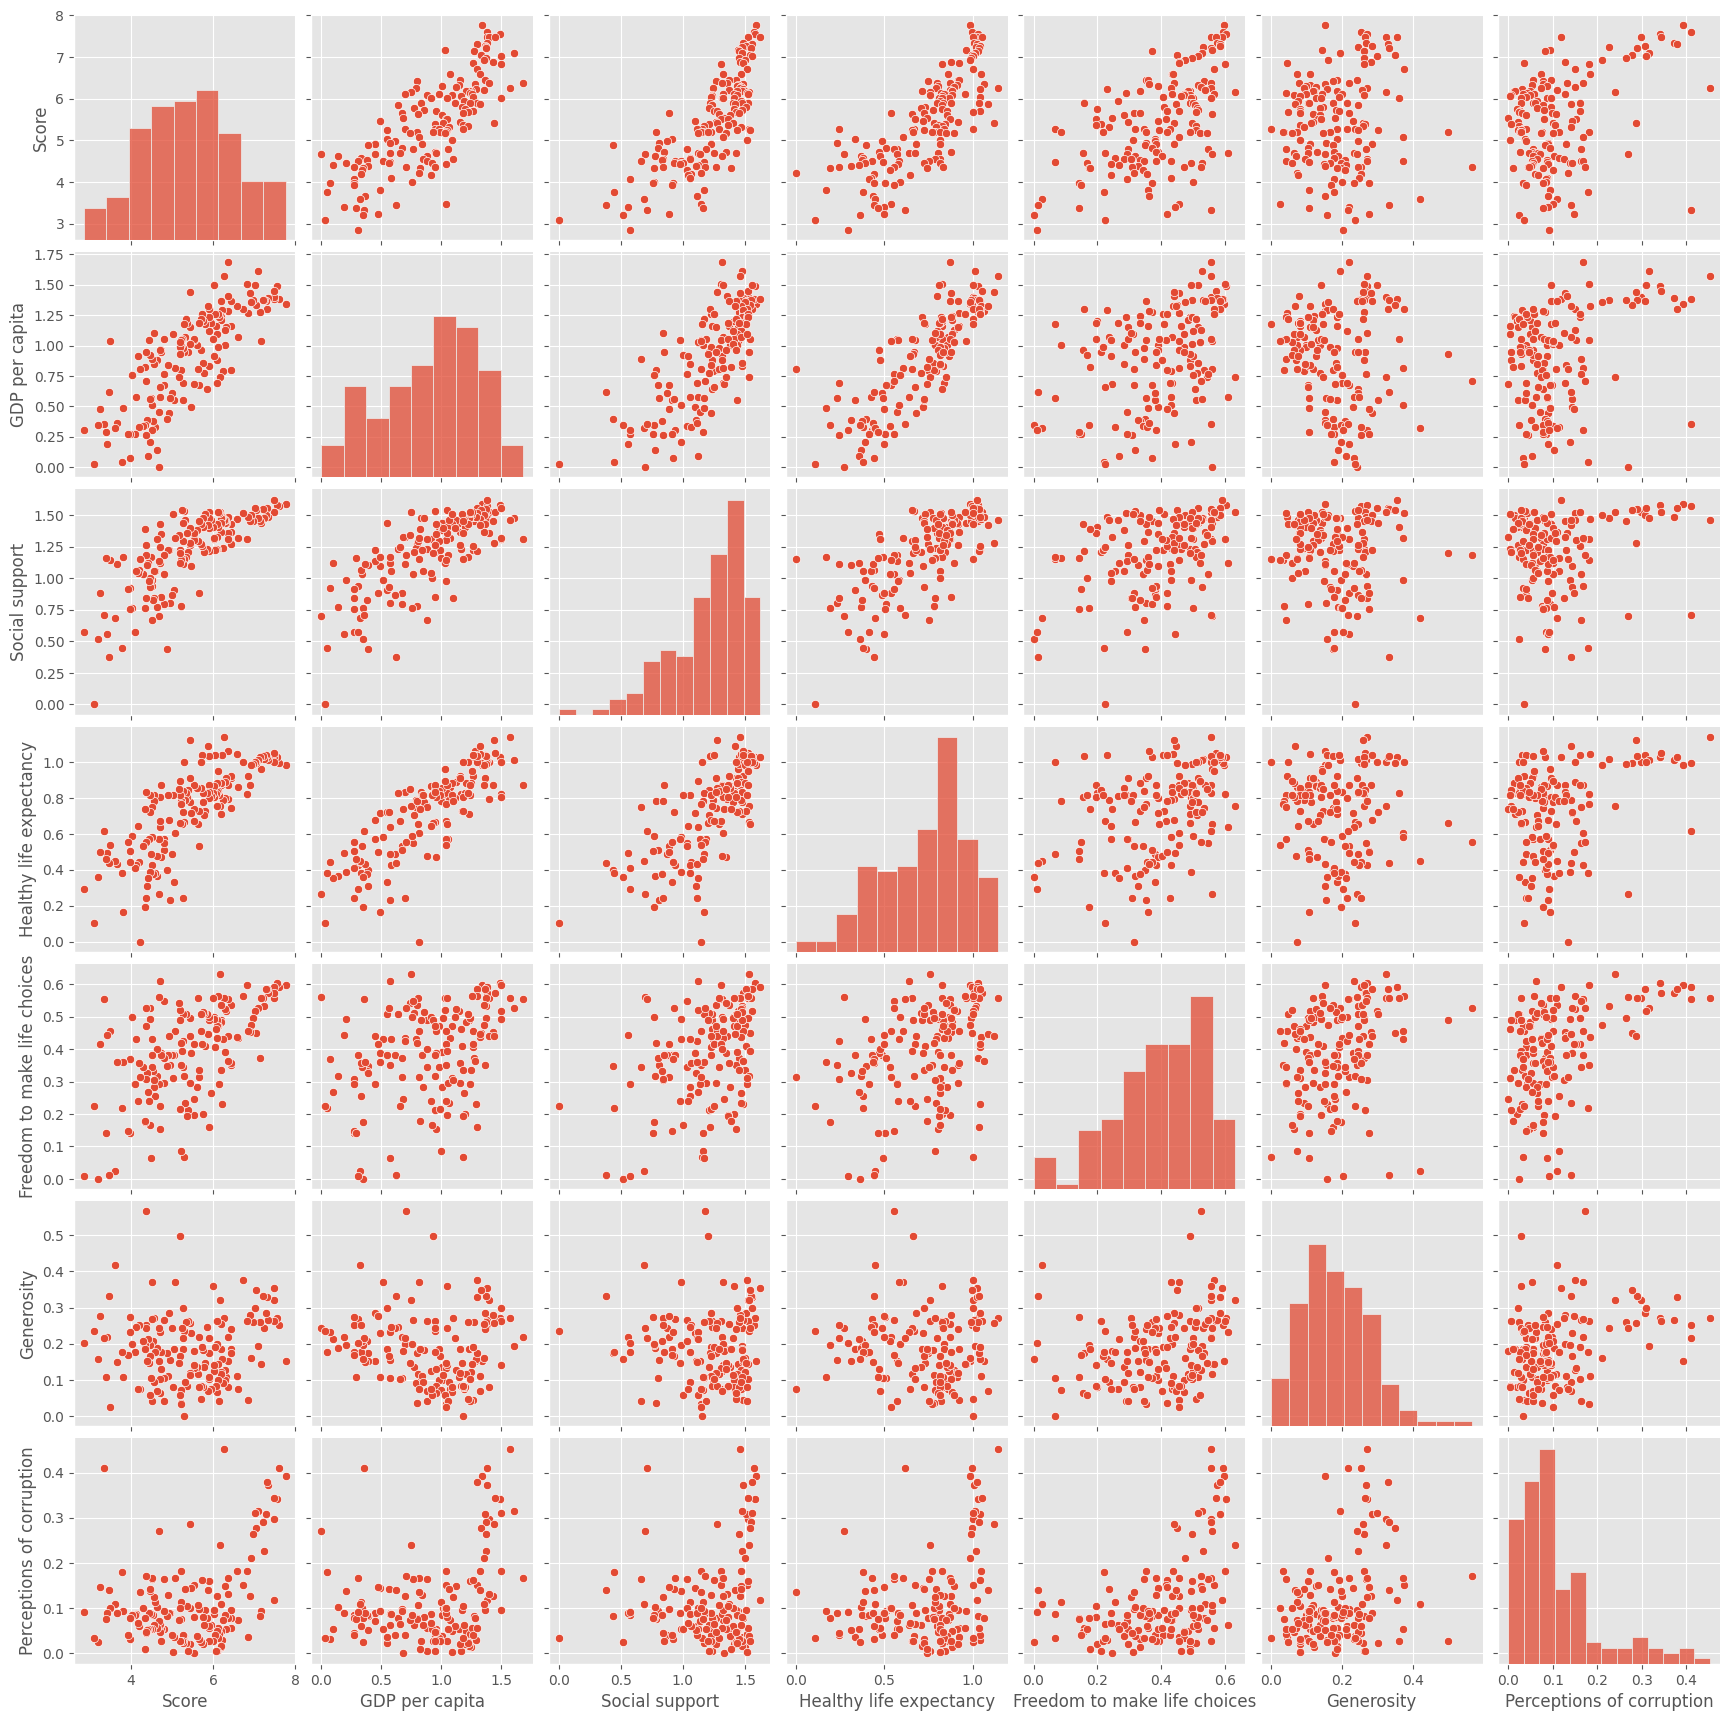

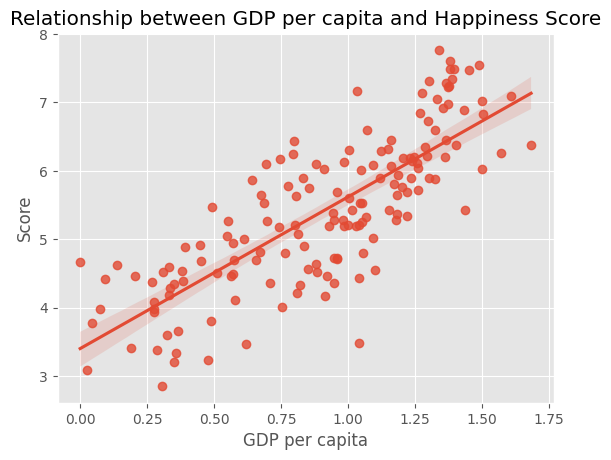

In [ ]:
# Seleccionar sólo columnas numéricas para el análisis de correlación
numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas
print(numeric_df.describe())

# Matriz de correlación para características numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of World Happiness Dataset (Numeric Features)')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='GDP per capita', y='Score', data=df)  # Usando df original para contexto
plt.title('Relationship between GDP per capita and Happiness Score')
plt.show()

            Score  GDP per capita  Social support  Healthy life expectancy  \
cluster                                                                      
0        5.586928        1.039530        1.310337                 0.817892   
1        4.253511        0.399311        0.865600                 0.421200   
2        6.728000        1.319750        1.459464                 0.939250   

         Freedom to make life choices  Generosity  Perceptions of corruption  \
cluster                                                                        
0                            0.382205    0.133217                   0.069301   
1                            0.318911    0.209089                   0.100667   
2                            0.541679    0.298929                   0.249000   

         cluster  
cluster           
0            0.0  
1            1.0  
2            2.0  


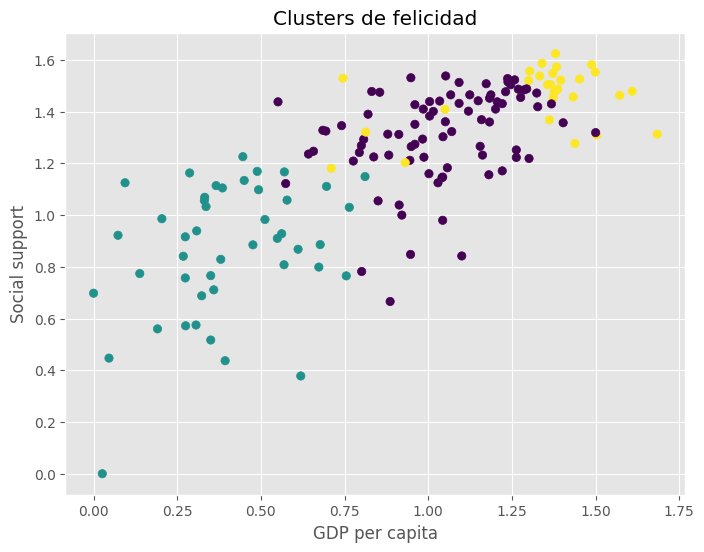

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes para el clustering
X = df[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

# Escalar los datos para que todas las variables tengan la misma importancia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir el número de clusters (puedes ajustar este valor)
n_clusters = 3   #Técnica de codo, método de la  silueta.

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Asignar las etiquetas de cluster a los datos
datosorginal=df
df['cluster'] = kmeans.labels_

# Calculate the mean for only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby('cluster')[numeric_cols].mean()  # Select numeric columns for mean calculation

# Mostrar los resultados
print(cluster_means)

# Visualizar los clusters (ejemplo con dos variables)
plt.figure(figsize=(8, 6))
plt.scatter(df['GDP per capita'], df['Social support'], c=df['cluster'], cmap='viridis')
plt.xlabel('GDP per capita')
plt.ylabel('Social support')
plt.title('Clusters de felicidad')
plt.show()


Análisis del Cluster 0:

Estadísticas Descriptivas:
           Score  GDP per capita  Social support  Healthy life expectancy  \
count  83.000000       83.000000       83.000000                83.000000   
mean    5.586928        1.039530        1.310337                 0.817892   
std     0.715493        0.200767        0.179714                 0.127103   
min     3.488000        0.551000        0.666000                 0.469000   
25%     5.202500        0.912500        1.224500                 0.755000   
50%     5.693000        1.043000        1.346000                 0.815000   
75%     6.111500        1.194000        1.441500                 0.881000   
max     7.167000        1.500000        1.538000                 1.088000   

       Freedom to make life choices  Generosity  Perceptions of corruption  \
count                     83.000000   83.000000                  83.000000   
mean                       0.382205    0.133217                   0.069301   
std                

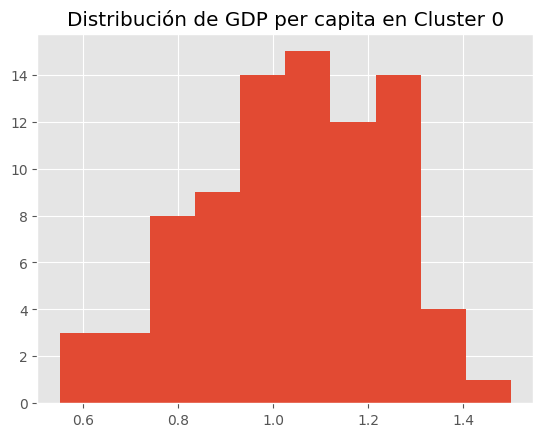


Variable: Social support
count    83.000000
mean      1.310337
std       0.179714
min       0.666000
25%       1.224500
50%       1.346000
75%       1.441500
max       1.538000
Name: Social support, dtype: float64


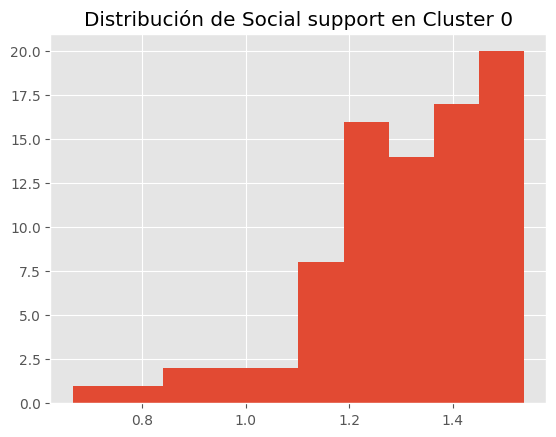


Variable: Healthy life expectancy
count    83.000000
mean      0.817892
std       0.127103
min       0.469000
25%       0.755000
50%       0.815000
75%       0.881000
max       1.088000
Name: Healthy life expectancy, dtype: float64


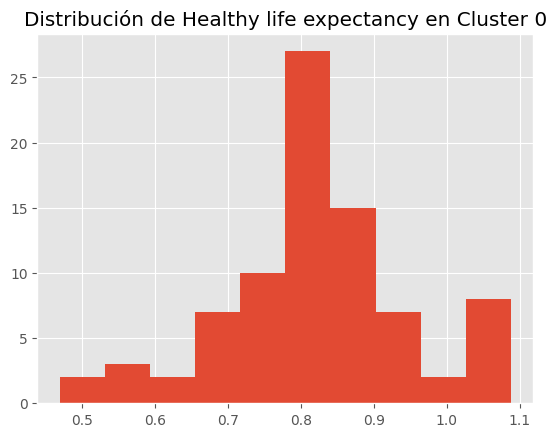


Países en el Cluster:
Country or region
Costa Rica      1
Lebanon         1
Morocco         1
Algeria         1
Turkmenistan    1
               ..
Ecuador         1
Cyprus          1
Romania         1
Argentina       1
Botswana        1
Name: count, Length: 83, dtype: int64

Análisis del Cluster 1:

Estadísticas Descriptivas:
           Score  GDP per capita  Social support  Healthy life expectancy  \
count  45.000000       45.000000       45.000000                45.000000   
mean    4.253511        0.399311        0.865600                 0.421200   
std     0.649954        0.204226        0.258264                 0.152836   
min     2.853000        0.000000        0.000000                 0.000000   
25%     3.802000        0.275000        0.757000                 0.357000   
50%     4.374000        0.366000        0.910000                 0.433000   
75%     4.668000        0.562000        1.069000                 0.508000   
max     5.653000        0.811000        1.226000      

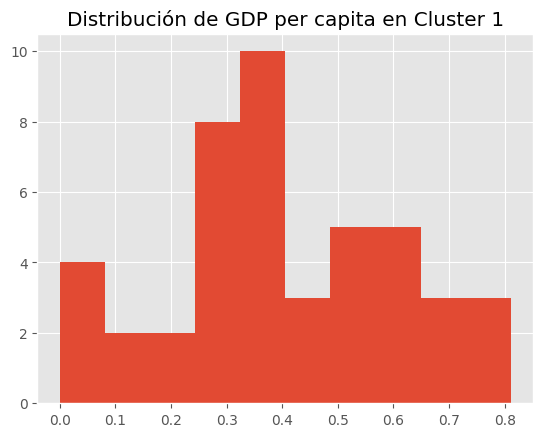


Variable: Social support
count    45.000000
mean      0.865600
std       0.258264
min       0.000000
25%       0.757000
50%       0.910000
75%       1.069000
max       1.226000
Name: Social support, dtype: float64


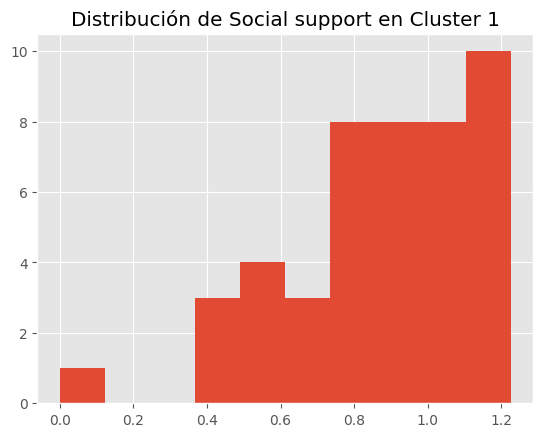


Variable: Healthy life expectancy
count    45.000000
mean      0.421200
std       0.152836
min       0.000000
25%       0.357000
50%       0.433000
75%       0.508000
max       0.723000
Name: Healthy life expectancy, dtype: float64


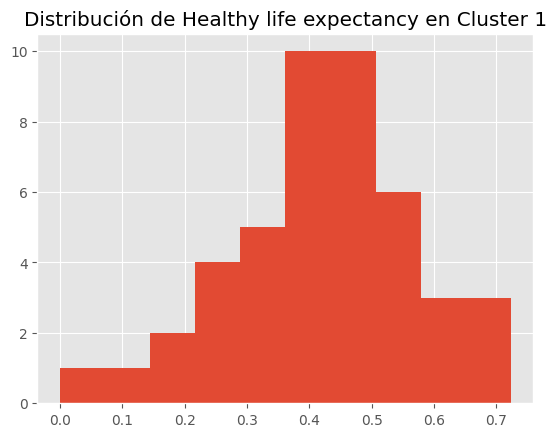


Países en el Cluster:
Country or region
Pakistan                    1
Chad                        1
Swaziland                   1
Uganda                      1
Zambia                      1
Togo                        1
India                       1
Liberia                     1
Comoros                     1
Madagascar                  1
Lesotho                     1
Burundi                     1
Zimbabwe                    1
Haiti                       1
Syria                       1
Malawi                      1
Yemen                       1
Rwanda                      1
Tanzania                    1
Afghanistan                 1
Central African Republic    1
Ethiopia                    1
Sierra Leone                1
Tajikistan                  1
Mali                        1
Nigeria                     1
Cameroon                    1
Ghana                       1
Ivory Coast                 1
Nepal                       1
Benin                       1
Congo (Brazzaville)         1

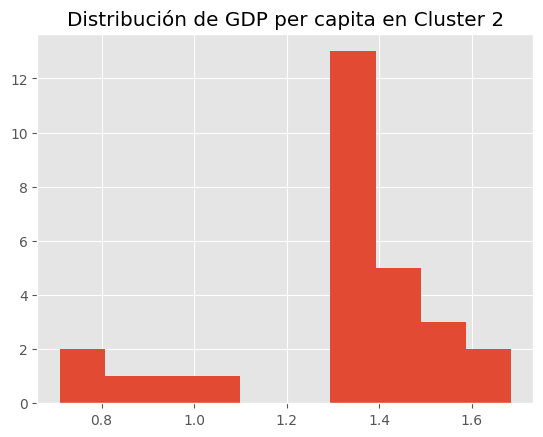


Variable: Social support
count    28.000000
mean      1.459464
std       0.118059
min       1.181000
25%       1.398750
50%       1.495500
75%       1.540500
max       1.624000
Name: Social support, dtype: float64


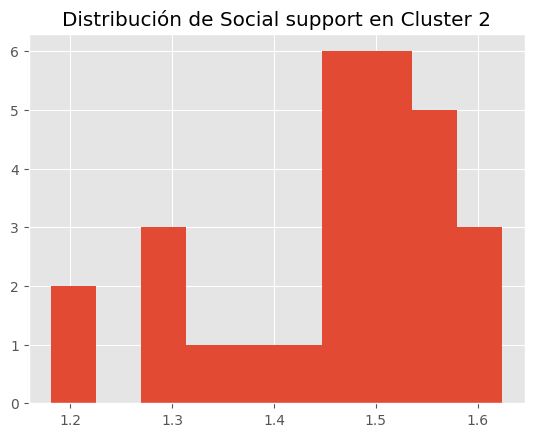


Variable: Healthy life expectancy
count    28.000000
mean      0.939250
std       0.146503
min       0.555000
25%       0.871000
50%       0.997500
75%       1.026000
max       1.141000
Name: Healthy life expectancy, dtype: float64


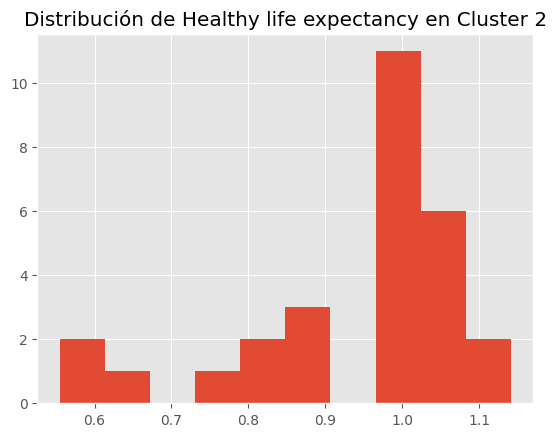


Países en el Cluster:
Country or region
Finland                 1
Denmark                 1
Bhutan                  1
Indonesia               1
Hong Kong               1
Thailand                1
Uzbekistan              1
Bahrain                 1
Singapore               1
Qatar                   1
Malta                   1
United Arab Emirates    1
United States           1
Belgium                 1
Germany                 1
Ireland                 1
United Kingdom          1
Luxembourg              1
Australia               1
Austria                 1
Canada                  1
New Zealand             1
Sweden                  1
Switzerland             1
Netherlands             1
Iceland                 1
Norway                  1
Myanmar                 1
Name: count, dtype: int64


In [ ]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
  print(f"\nAnálisis del Cluster {cluster_num}:")
  cluster_data = df[df['cluster'] == cluster_num]

  # Estadísticas descriptivas para variables numéricas
  print("\nEstadísticas Descriptivas:")
  print(cluster_data.describe())

  # Distribución de variables clave (ejemplo: GDP per capita, Social support)
  print("\nDistribución de Variables Clave:")
  for col in ['GDP per capita', 'Social support', 'Healthy life expectancy']:
    print(f"\nVariable: {col}")
    print(cluster_data[col].describe())
    # Puedes agregar un histograma para visualizar la distribución
    plt.hist(cluster_data[col], bins=10)
    plt.title(f"Distribución de {col} en Cluster {cluster_num}")
    plt.show()

  # Analizar la distribución de países en cada cluster
  print("\nPaíses en el Cluster:")
  print(cluster_data['Country or region'].value_counts())

##Análisis de componentes principales
El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [ ]:
# Gráficos
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# Select only numeric features for PCA
numeric_features = df.select_dtypes(include=np.number).columns
X_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X_numeric)  # Fit on numeric data only

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
num_pcs = modelo_pca.n_components_ # Get the actual number of components
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X_numeric.columns, # Use columns for numeric data only
    index   = [f'PC{i+1}' for i in range(num_pcs)] # Dynamically create index
)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
PC1,0.471062,0.442020,0.422315,0.435603,0.341027,0.082058,0.273164,0.130259
PC2,-0.068335,-0.201840,-0.214063,-0.204423,0.189872,0.541068,0.412526,0.606626
PC3,-0.052893,0.165901,-0.199836,0.084526,-0.459045,-0.518877,0.641148,0.177687
PC4,-0.036109,-0.227798,-0.099916,-0.232438,0.749708,-0.487207,0.241709,-0.157919
PC5,0.180037,-0.070930,0.589543,-0.552010,-0.146760,-0.282615,-0.162450,0.427177
PC6,-0.350167,-0.352054,0.589874,0.051496,-0.112763,0.215403,0.440185,-0.387248
PC7,0.714634,-0.638035,-0.122136,0.130796,-0.183111,-0.005735,0.064012,-0.111914
PC8,-0.321864,-0.385231,0.124415,0.618721,0.084153,-0.260010,-0.247909,0.462126


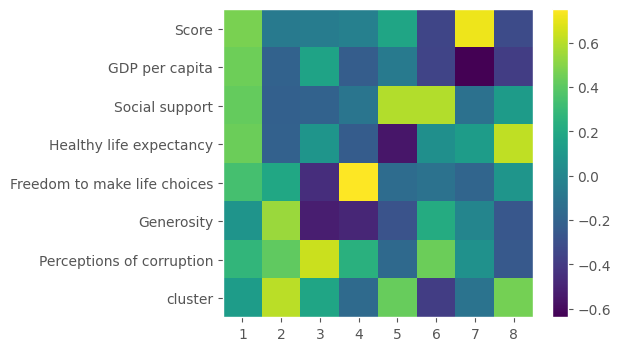

In [ ]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X_numeric.columns)), X_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.48198309 0.26659319 0.07862123 0.07261709 0.03827638 0.02618966
 0.02047697 0.01524238]


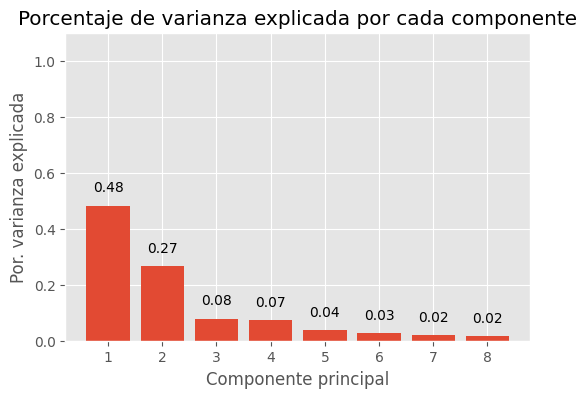

In [ ]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.48198309 0.74857629 0.82719752 0.89981461 0.93809099 0.96428065
 0.98475762 1.        ]


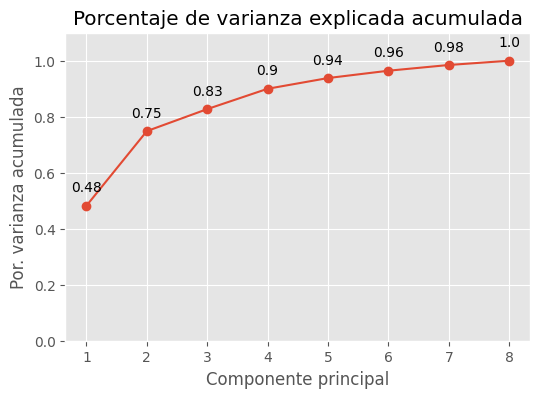

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Modelo

In [ ]:
# Gráficos
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing


In [ ]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
11,GDP per capita,Healthy life expectancy,0.835462,0.835462
25,Healthy life expectancy,GDP per capita,0.835462,0.835462
1,Score,GDP per capita,0.793883,0.793883
8,GDP per capita,Score,0.793883,0.793883
3,Score,Healthy life expectancy,0.779883,0.779883


In [ ]:
# División de los datos en train y test
X = df.drop(columns='Score')
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# División de los datos en train y test
# Select only numerical features for the model
numerical_features = df.select_dtypes(include=['float64', 'int']).columns
X = df[numerical_features].drop(columns='Score')
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.5123750135754885



## Con PCA

In [ ]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [ ]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [ ]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.5123750135754888


In [ ]:
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 5, 6]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, shuffle=True, random_state=123), # Added shuffle=True
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
1,2,-0.558870,0.100121,-0.549417,0.024768
4,6,-0.561818,0.088580,-0.530245,0.021058
3,5,-0.566993,0.091553,-0.533223,0.020692


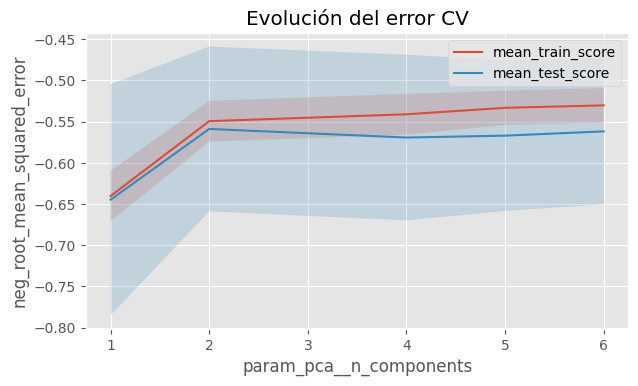

In [ ]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [ ]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 2} : -0.5588703917886841 neg_root_mean_squared_error


Los resultados de validación cruzada muestran que, el mejor modelo, se obtiene empleando las 4 primeras componentes. Sin embargo, teniendo en cuenta la evolución del error y su intervalo, a partir de la 2 componente no se consiguen mejoras significativas.

In [ ]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [ ]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.48090387729390593


Fuente:

*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://cienciadedatos.net/documentos/py19-pca-python
*   https://www.kaggle.com/



